## Assignment-2

**22nd-June-2022**

### Q4 : KSOM color map

In [1]:
#Importing libraries
import numpy as np
from matplotlib import pyplot as plt
import random

def euclidean_distance(grid, vector):
    """
    Calculates normalized distance between two array
    Inputs : 100*100 neuron grid (array), 
    Returns : distance (float)
    """
    return np.linalg.norm((grid-vector), axis=2)


class SOM:
    """
     Kohonen self organizing map (SOM), which gives as an output some shades of color mapped over a grid. 
     The input of the SOM are 24 rgb colors 
    """

    def __init__(self, x, y, d, s_0, a_0, epochs):
        """
        Initializes the class instance, implicit call is made to __init__ method
        """
        self.x = x #height
        self.y = y #width
        self.c = d #channels
        self.weights = np.random.rand(x, y, d) #random iniltialization of weight array
        self.grid = np.stack(np.unravel_index(np.arange(x*y).reshape(x, y), (x, y)), 2) #to arrange in (i, j) fashion later used to calculate distance
        self.s_0 = s_0 #spread
        self.total_epoch = epochs #total iteration of training loop
        self.a_0 = a_0 #initial learning rate

    def best_matching_unit(self, x_j):
        """
        Calculate the winning node as SOM follows winner takes all strategy
        Returns neuron whose weight vector is most similar to the input by calculating euclidean distance
        Inputs : data at jth index (array)
        Returns : array
        """
        index = np.argmin(np.sum((self.weights - x_j) ** 2, axis=2)) #index of most similar neuron
        return np.array([[index // self.x, index % self.y]])

    def update(self, x_j, e_num):
        """
        Updates weight based on global network update phase using varying 
        learning rate, varying sigma and neighbors calculated based on euclidean between data at 
        index j and data at best matchinh unit index
        Inputs : data at unit j, current_epoch_number        
        """
        winner_index = self.best_matching_unit(x_j) #index of winner neuron based on bmu method
        distance = euclidean_distance(self.grid, winner_index) #distance between 100*100 grid and winner_index
        alpha = self.a_0*np.exp(-e_num/self.total_epoch) #Varying learning rate by (-k/T)
        sigma = self.s_0*np.exp(-e_num/self.total_epoch) #Varying sigma by (-k/T)
        neighbor = np.exp(-((distance**2)/(2*(sigma**2)))).reshape(self.x, self.y, 1) #neighbors function
        self.weights -= neighbor * alpha * (self.weights - x_j) #update weights based on global network update

    def plots(self, data):
        """
        Displays plots at end of predefined epochs after updating weights to cluster points
        Inputs : normalized rgb colors array
        """
        l = len(data) # total data points(24)
        for i in range(self.total_epoch):
            if i == 0: #to show random weights at start of iteration
                plt.imshow(self.weights) #3D array 
                plt.title('Random initialized weights, sigma=%i' % self.s_0)
                plt.show()
            indx = np.random.permutation(l) #randomly select any index from data input
            data = data[indx] #data at randomly selected index
            for j in range(l): #updating weights for every iteration
                self.update(data[j], i)
            if i in [19, 39, 99, 999]:
                plt.title('After %i epochs, sigma=%i' % (i+1, self.s_0))
                plt.imshow(self.weights) #weight array after updates
                plt.show()

In [2]:
colors_rgb = np.array([[128,0,0], [139,0,0], [220,20,60], [255,0,0], [255,99,71],
                        [124,252,0], [0,100,0], [50,205,50], [0,128,0], [46,139,87],
                        [176,224,230], [95,158,160], [70,130,180], [0,0,255], [138,43,226],
                        [255,255,224], [250,250,210], [255,250,205],
                        [0,128,128], [0,139,139], [47,79,79],
                        [255,192,203], [255,20,147], [255,105,180]])

"""colors_names = ['marron' , 'dark_red', 'crimson', 'red', 'tomato',
               'lawn_green', 'dark_green', 'lime_green', 'green', 'sea_green',
               'power_blue', 'cadet_blue', 'steel_blue', 'blue', 'blue_violet',
               'light_yellow', 'light_golden_rod_yellow', 'lemon_chiffon',
               'teal', 'dark_cyan', 'dark_slate_grey',
               'pink', 'deep_pink', 'hot_pink']"""

normalized_colors_rgb = colors_rgb/255
print(f'Shape of colors array: {normalized_colors_rgb.shape}')

Shape of colors array: (24, 3)


In [3]:
print(f'Normalized colors array : {normalized_colors_rgb}')

Normalized colors array : [[0.50196078 0.         0.        ]
 [0.54509804 0.         0.        ]
 [0.8627451  0.07843137 0.23529412]
 [1.         0.         0.        ]
 [1.         0.38823529 0.27843137]
 [0.48627451 0.98823529 0.        ]
 [0.         0.39215686 0.        ]
 [0.19607843 0.80392157 0.19607843]
 [0.         0.50196078 0.        ]
 [0.18039216 0.54509804 0.34117647]
 [0.69019608 0.87843137 0.90196078]
 [0.37254902 0.61960784 0.62745098]
 [0.2745098  0.50980392 0.70588235]
 [0.         0.         1.        ]
 [0.54117647 0.16862745 0.88627451]
 [1.         1.         0.87843137]
 [0.98039216 0.98039216 0.82352941]
 [1.         0.98039216 0.80392157]
 [0.         0.50196078 0.50196078]
 [0.         0.54509804 0.54509804]
 [0.18431373 0.30980392 0.30980392]
 [1.         0.75294118 0.79607843]
 [1.         0.07843137 0.57647059]
 [1.         0.41176471 0.70588235]]


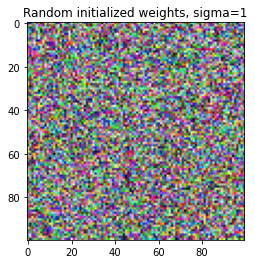

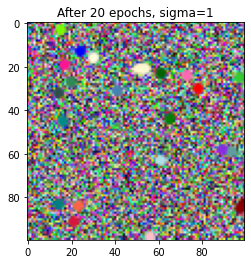

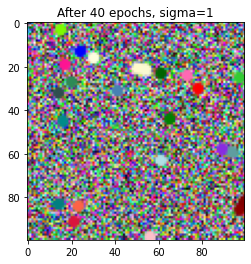

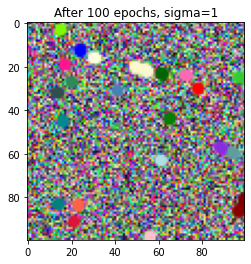

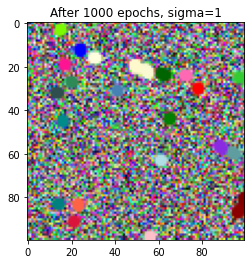

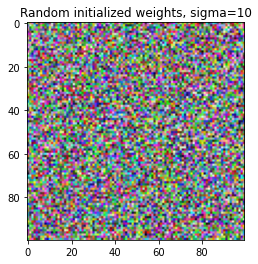

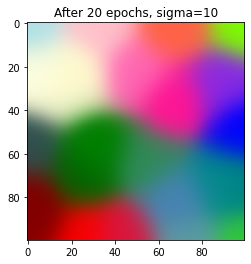

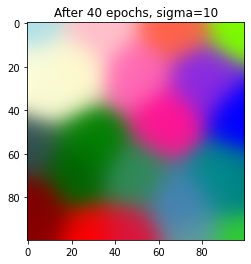

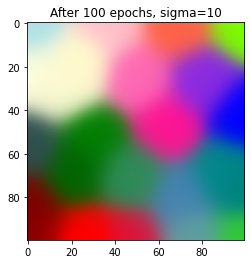

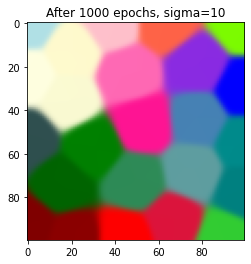

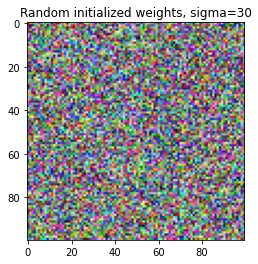

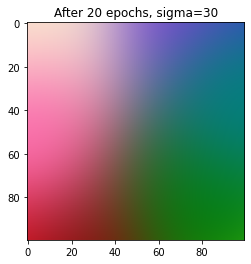

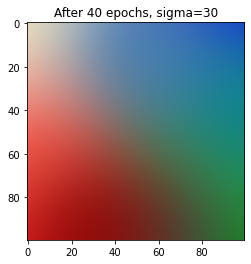

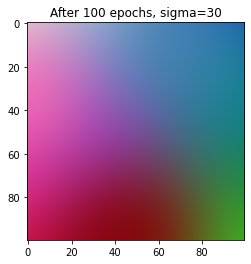

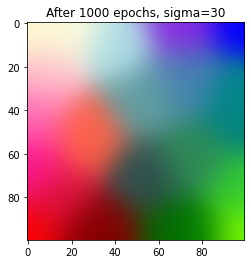

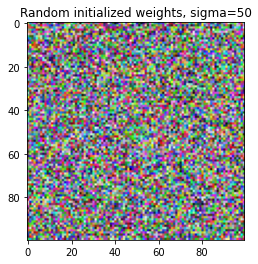

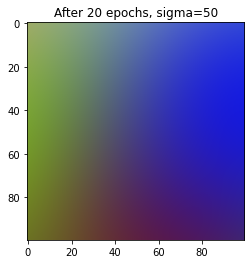

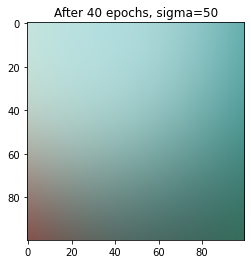

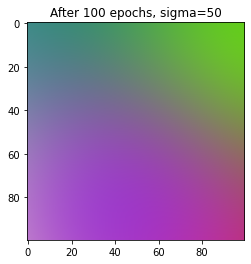

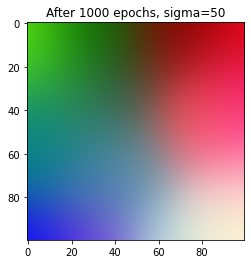

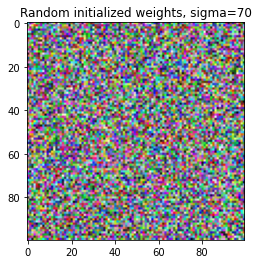

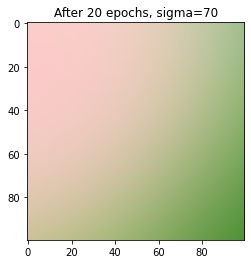

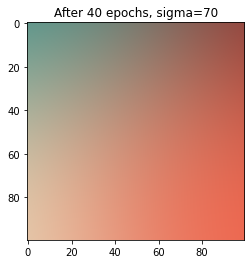

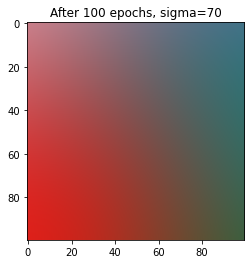

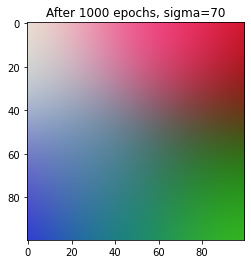

In [4]:
#Generate a figure of the original grid (random weights) followed by figures of the SOM after 20, 40, 100, 1000 
#epochs. Change the value of sigma = 1, 10, 30, 50, 70

for sigma in [1, 10, 30, 50, 70]:
    ksom_nn = SOM(x=100, y=100, d=3, s_0=sigma, a_0=0.8, epochs=1000)
    ksom_nn.plots(normalized_colors_rgb)

### Conclusions

1. The entire grid eventually matches the full input dataset after traversing over every node in the grid, with dissimilar nodes being separated and like nodes being gathered together in certain boxes or other shapes like L, hexagon, square etc
2. As radius(spread) and learning rate both decay over time by (-k/T) we observe that distinctions are finer among colors with certain defines shapes like hexagons with 10, for other sigmas there are edges that distingusih between color shades
3. As the sigma is increased, the boundaries between colors decrease. With smaller sigma the boundaries are more clear, or colours are clearly seperated which points directly to the points that could be included in radius and corresponding neighborhood functions. As spread increases there are larger neighbors and change is relatively small to seperate clusters.

### References

[1]. Retreived from URL : https://en.wikipedia.org/wiki/Self-organizing_map

[2]. Retreived from URL : http://www.rapidtables.com/web/color/RGB_Color.htm

[3]. Retreived from URL : http://www.cs.hmc.edu/~kpang/nn/som.html

[4]. Retreived from URL : https://towardsdatascience.com/kohonen-self-organizing-maps-a29040d688da

[5]. Retreived from URL : https://eklavyafcb.github.io/som.html

[6]. Retreived from URL : https://github.com/paulwong16/
